<a href="https://colab.research.google.com/github/GIRIRAJSHANKAR27/HeartAttackPrediction/blob/main/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load your dataset
# Replace 'heart.csv' with your actual dataset path
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

# Check the data structure
print(df.head())
print(df.info())

# Data Preprocessing
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definitions and training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Dictionary to store model evaluation metrics
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Predict probabilities for ROC AUC
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix
    }

    # Display model performance
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# Hyperparameter tuning using GridSearchCV for the best model
# Based on initial results, let's try improving SVM with hyperparameter tuning

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 0.01, 0.001]
}

# Using GridSearchCV to find the best parameters for SVM
svm = SVC(probability=True)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
best_svm = grid_search_svm.best_estimator_
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_search_svm.best_score_)

# Evaluate the tuned model on the test data
y_pred_best_svm = best_svm.predict(X_test)
y_prob_best_svm = best_svm.predict_proba(X_test)[:, 1]

accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
precision_best_svm = precision_score(y_test, y_pred_best_svm)
recall_best_svm = recall_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)
roc_auc_best_svm = roc_auc_score(y_test, y_prob_best_svm)
conf_matrix_best_svm = confusion_matrix(y_test, y_pred_best_svm)

print("\nTuned SVM - Accuracy:", accuracy_best_svm)
print("Precision:", precision_best_svm)
print("Recall:", recall_best_svm)
print("F1 Score:", f1_best_svm)
print("ROC AUC:", roc_auc_best_svm)
print("Confusion Matrix:")
print(conf_matrix_best_svm)

# Compare results
print("\nModel Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")

print("\nTuned SVM:")
print(f"Accuracy: {accuracy_best_svm:.2f}, Precision: {precision_best_svm:.2f}, Recall: {recall_best_svm:.2f}, F1 Score: {f1_best_svm:.2f}, ROC AUC: {roc_auc_best_svm:.2f}")


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 en

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

# Load your dataset (assuming it's already loaded as df and split into X and y)

# Feature Engineering: Adding Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Balancing the dataset with SMOTE if needed
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_poly, y)

# Splitting the data into training and test sets again after SMOTE and feature engineering
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Recursive Feature Elimination (RFE)
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Tuning Logistic Regression with Cross-Validation
log_reg_cv = LogisticRegressionCV(cv=5, penalty='l2', scoring='accuracy', max_iter=1000, solver='liblinear', Cs=10)
log_reg_cv.fit(X_train_rfe, y_train)

# Making predictions and evaluating the tuned model
y_pred_log_reg = log_reg_cv.predict(X_test_rfe)
y_prob_log_reg = log_reg_cv.predict_proba(X_test_rfe)[:, 1]

# Metrics calculation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("\nImproved Logistic Regression:")
print(f"Accuracy: {accuracy_log_reg:.2f}, Precision: {precision_log_reg:.2f}, Recall: {recall_log_reg:.2f}, F1 Score: {f1_log_reg:.2f}, ROC AUC: {roc_auc_log_reg:.2f}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)



Improved Logistic Regression:
Accuracy: 0.87, Precision: 0.87, Recall: 0.87, F1 Score: 0.87, ROC AUC: 0.94
Confusion Matrix:
[[109  16]
 [ 17 110]]


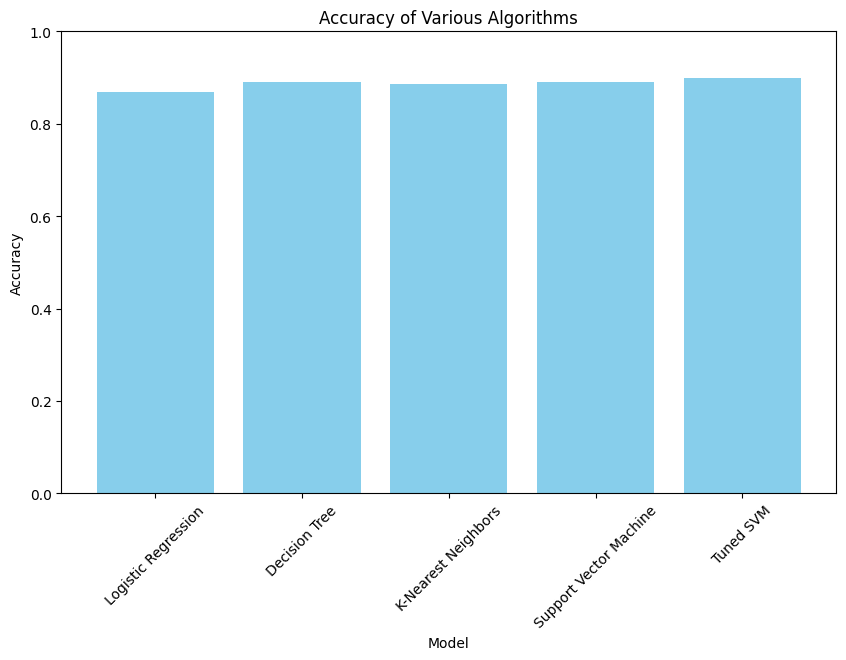

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have accuracy results for each model stored in a dictionary
model_accuracies = {
    "Logistic Regression": accuracy_log_reg,
    "Decision Tree": results["Decision Tree"]["Accuracy"],
    "K-Nearest Neighbors": results["K-Nearest Neighbors"]["Accuracy"],
    "Support Vector Machine": results["Support Vector Machine"]["Accuracy"],
    "Tuned SVM": accuracy_best_svm
}

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Various Algorithms")
plt.ylim(0, 1)  # Set y-axis limits to show accuracies as percentages
plt.xticks(rotation=45)
plt.show()


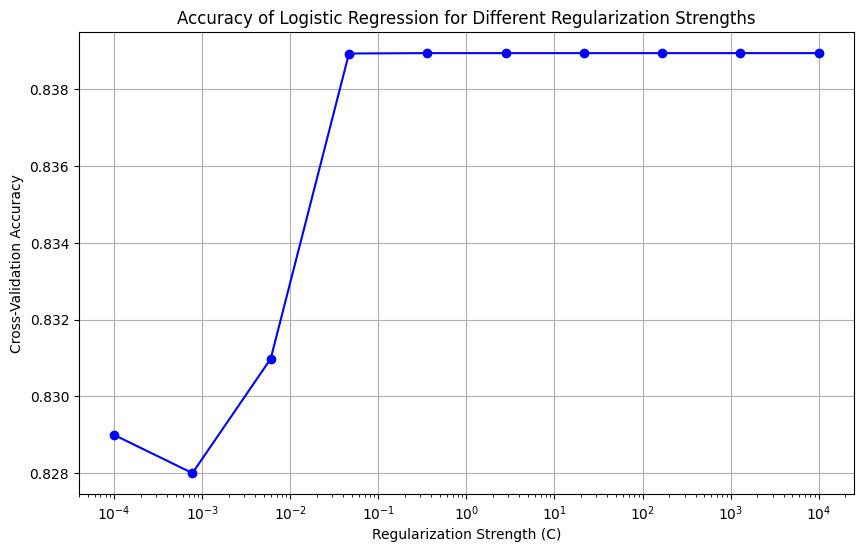

In [ ]:
# Assuming you did hyperparameter tuning and stored cross-validation results in an array `c_values` and `cv_accuracies`
c_values = log_reg_cv.Cs_  # Regularization strengths used in the cross-validation
cv_accuracies = log_reg_cv.scores_[1].mean(axis=0)  # Average cross-validation accuracy for each C value

# Plotting accuracy vs. regularization strength
plt.figure(figsize=(10, 6))
plt.plot(c_values, cv_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Accuracy of Logistic Regression for Different Regularization Strengths")
plt.xscale('log')  # Use log scale for C values
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined
# Initialize and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Logistic regression score (accuracy) on the test set
test_score = log_reg.score(X_test, y_test)
print(f"Logistic Regression Test Accuracy (Score): {test_score:.2f}")


Logistic Regression Test Accuracy (Score): 0.90


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on test set
y_pred = log_reg.predict(X_test)

# Additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.90
Recall: 0.91
F1 Score: 0.90


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Simplified Logistic Regression with regularization tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_log_reg = grid_search.best_estimator_

# Evaluate the tuned Logistic Regression model
y_pred = best_log_reg.predict(X_test)
y_prob = best_log_reg.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTuned Logistic Regression:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)



Tuned Logistic Regression:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
ROC AUC: 0.95
Confusion Matrix:
[[112  13]
 [ 13 114]]
